In [1]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC

import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import sys, os
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

In [2]:
def box_plot(dataframe, col_list_float, plot_kind):
    """
    This function generates boxplots to show distribution and outliers of various parameters
    """
    
   
    x_val = 1
    y_val = len(col_list_float)
        
    if len(dataframe['model_year'].unique()) ==1:
        title_year = dataframe['model_year'].min()
    else:
        title_year = f'{dataframe["model_year"].min()} - {dataframe["model_year"].max()}'
        
    fig1, axes = plt.subplots(x_val,y_val , sharey=True, figsize=(18,6))
    
    k=0
    for i in range(0,x_val):
        for j in range(0,y_val):

            variable= col_list_float[k].lower()
            if plot_kind=="box":
                sns.boxplot(ax=axes[j], data=dataframe, x=variable)
                fig1.suptitle(f'Outlier identification by vehicle class {title_year}')
            elif plot_kind=="hist":
                sns.histplot(ax=axes[j], data=dataframe, x=variable,bins=10)
                fig1.suptitle(f'Distribution of data {title_year}')
            k+=1
    plt.show()

In [3]:
def generate_count_plots_by_feature(dataframe,feature):
    
    models = dataframe.groupby(feature).count()['model_year'].reset_index().rename(columns={"model_year":"count"}).sort_values(by="count", ascending=False)
    plt.rcParams["figure.figsize"] = (20,3)
    plt.bar(x = models[feature], height = models['count'])
    plt.xticks(rotation=90)
    plt.xlabel("Make")
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {feature.replace('_',' ')} (2022 - 1995)")
    plt.show()

In [4]:

sys.path.append(os.path.abspath(os.path.join('..','./data/', './clean-data/')))
paths = sys.path
clean_path = [item for item in paths if "machine-learning-capstone\\data\\clean-data" in item]
clean_data = clean_path[0]


file_name_2022_1995 = "1995_2022_vehicle_fuel_consumption.csv"
pure_electric = "Battery-electric_vehicles_2012-2022_(2022-05-16).csv"
hybric_vehicle = "Plug-in_hybrid_electric_vehicles_2012-2022_(2022-03-28).csv"

master_df = pd.read_csv(Path(clean_data,f'{file_name_2022_1995}'))
electric_df = pd.read_csv(Path(clean_data,f'{pure_electric}'))
hybrid_df = pd.read_csv(Path(clean_data,f'{hybric_vehicle}'))

In [5]:
master_df['number_of_gears'].fillna(0, inplace=True)

In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     26159 non-null  int64  
 1   make_                          26159 non-null  object 
 2   model.1_                       26159 non-null  object 
 3   vehicleclass_                  26159 non-null  object 
 4   enginesize_(l)                 26159 non-null  float64
 5   cylinders_                     26159 non-null  float64
 6   transmission_                  26159 non-null  object 
 7   fuel_type                      26159 non-null  object 
 8   fuelconsumption_city(l/100km)  26159 non-null  float64
 9   fuelconsumption_hwy(l/100km)   26159 non-null  float64
 10  fuelconsumption_comb(l/100km)  26159 non-null  float64
 11  fuelconsumption_comb(mpg)      26159 non-null  int64  
 12  co2emissions_(g/km)            26159 non-null 

In [7]:
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   model_year                       310 non-null    int64  
 1   make_                            310 non-null    object 
 2   model.1_                         310 non-null    object 
 3   vehicleclass_                    310 non-null    object 
 4   motor_(kw)                       310 non-null    int64  
 5   transmission_                    310 non-null    object 
 6   fuel_type                        310 non-null    object 
 7   consumption_city(kwh/100km)      310 non-null    float64
 8   fuelconsumption_hwy(kwh/100km)   310 non-null    float64
 9   fuelconsumption_comb(kwh/100km)  310 non-null    float64
 10  fuelconsumption_city(le/100km)   310 non-null    float64
 11  fuelconsumption_hwy(le/100km)    310 non-null    float64
 12  fuelconsumption_comb(l

In [8]:
hybrid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     217 non-null    int64  
 1   make_                          217 non-null    object 
 2   model.1_                       217 non-null    object 
 3   vehicleclass_                  217 non-null    object 
 4   motor_(kw)                     217 non-null    int64  
 5   enginesize_(l)                 217 non-null    float64
 6   cylinders_                     217 non-null    float64
 7   transmission_                  217 non-null    object 
 8   fuel_type1                     217 non-null    object 
 9   consumption_combinedle/100km   217 non-null    object 
 10  range1_(km)                    217 non-null    int64  
 11  recharge_time(h)               217 non-null    float64
 12  fuel.1_type2                   217 non-null    obj

## Correlation analysis

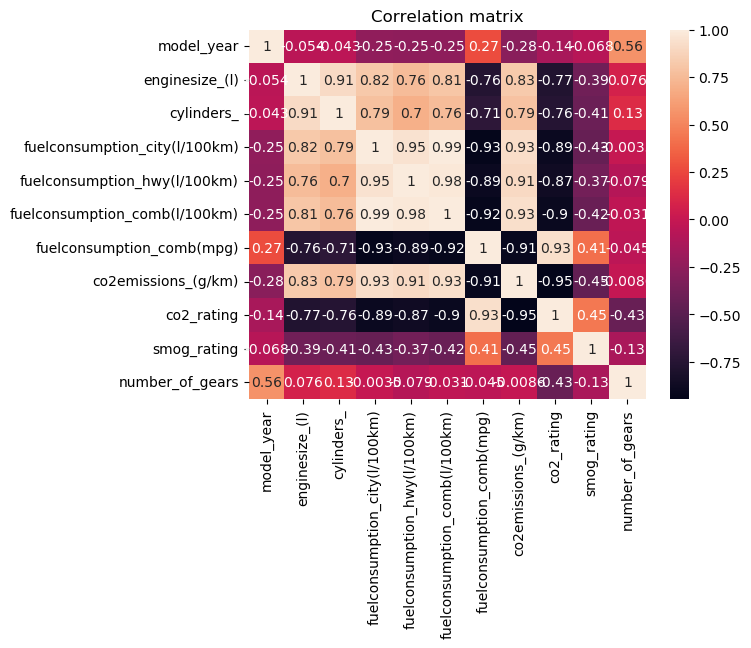

In [9]:
corr_matrix = master_df.corr()
fig_corr = sns.heatmap(corr_matrix, annot=True)
fig_corr.figure.savefig("./plots/correlation_matrix.png") 
plt.title("Correlation matrix")
plt.show()

### Introduce categorical variables in analysis

In [10]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model_year                     26159 non-null  int64  
 1   make_                          26159 non-null  object 
 2   model.1_                       26159 non-null  object 
 3   vehicleclass_                  26159 non-null  object 
 4   enginesize_(l)                 26159 non-null  float64
 5   cylinders_                     26159 non-null  float64
 6   transmission_                  26159 non-null  object 
 7   fuel_type                      26159 non-null  object 
 8   fuelconsumption_city(l/100km)  26159 non-null  float64
 9   fuelconsumption_hwy(l/100km)   26159 non-null  float64
 10  fuelconsumption_comb(l/100km)  26159 non-null  float64
 11  fuelconsumption_comb(mpg)      26159 non-null  int64  
 12  co2emissions_(g/km)            26159 non-null 

In [11]:


kf = KFold(n_splits=10)
folds = StratifiedGroupKFold(n_splits=10)

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [12]:
non_na_rating = master_df[~master_df['co2_rating'].isna()]

In [13]:


Y = non_na_rating[['co2_rating']]

X = non_na_rating[['vehicleclass_','make_','model.1_','model_year','cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)','co2emissions_(g/km)','number_of_gears']]


numeric_features =  ['model_year','cylinders_','fuelconsumption_city(l/100km)','fuelconsumption_hwy(l/100km)',
                     'fuelconsumption_comb(l/100km)','fuelconsumption_comb(mpg)','co2emissions_(g/km)','number_of_gears']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())]
)

categorical_features = ['vehicleclass_','make_','model.1_']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)



### Using linear regression

In [14]:
model_linear_regression = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

model_linear_regression.fit(X_train, y_train.values.ravel())
print("model score: %.3f" % model_linear_regression.score(X_test, y_test))

scores = cross_val_score(model_linear_regression,X,Y,scoring="neg_mean_squared_error",cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

print("Final RMSE:", final_avg_rmse)

model score: 0.924
Final RMSE: 0.4202533502923892


#### Predict real values

In [15]:
from sklearn_evaluation import plot

In [16]:
y_pred_lr = model_linear_regression.predict(X_test)
rounded_predicted_lr = np.array([round(item) for item in y_pred_lr])
y_true_lr = y_test['co2_rating'].values

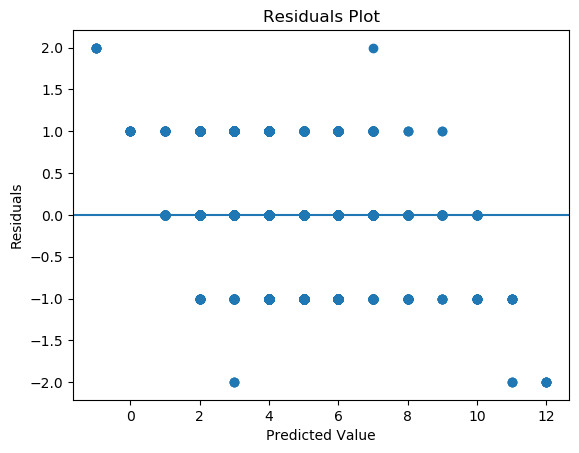

In [17]:
plot.residuals(y_true_lr, rounded_predicted_lr)

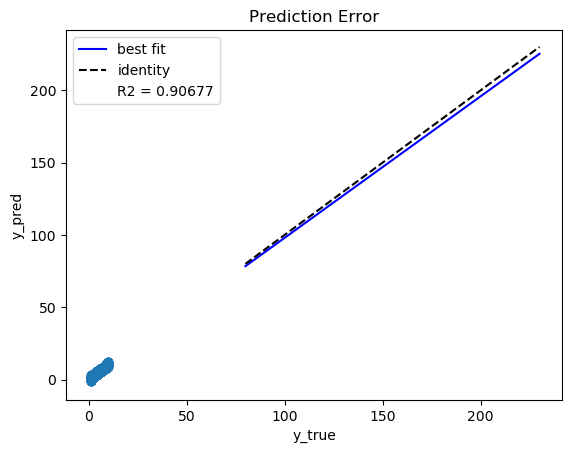

In [18]:
plot.prediction_error(y_true_lr, rounded_predicted_lr)

Text(0, 0.5, 'Predicted values')

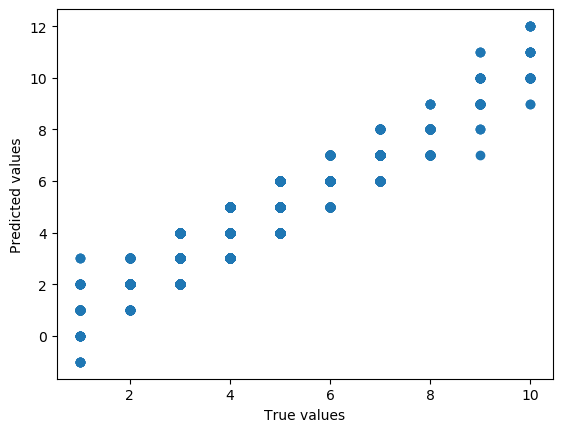

In [19]:
plt.scatter(y_true_lr, rounded_predicted_lr)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [20]:
for item in rounded_predicted_lr:
    if item>10:
        print(item)

12
11
12
11
11
11
11
12
12
11
12
11
11
11
12
11
11


### Using Gradient Boosting Regressor

In [21]:
model_gbreressor = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GradientBoostingRegressor())]
)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_gbreressor.fit(X_train, y_train.values.ravel())
print("model score: %.3f" % model_gbreressor.score(X_test, y_test))

scores = cross_val_score(model_gbreressor,X,Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

print("Final RMSE:", final_avg_rmse)

model score: 0.981
Final RMSE: 0.24849948484873208


#### Predicting values

In [22]:
y_pred_gbr = model_gbreressor.predict(X_test)
rounded_predicted_gbr = np.array([round(item) for item in y_pred_gbr])

y_true_gbr = y_test['co2_rating'].values

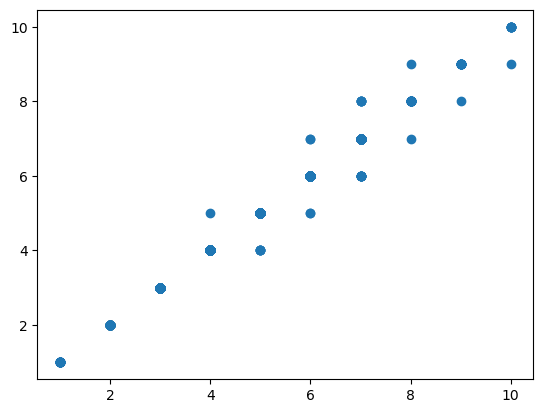

In [23]:
plt.scatter(y_true_gbr, rounded_predicted_gbr)

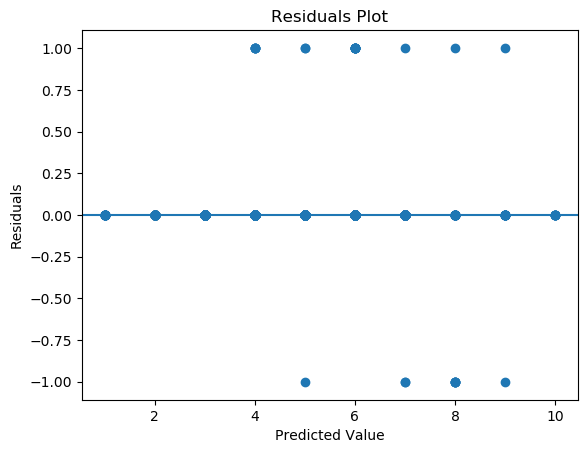

In [24]:
plot.residuals(y_true_gbr, rounded_predicted_gbr)

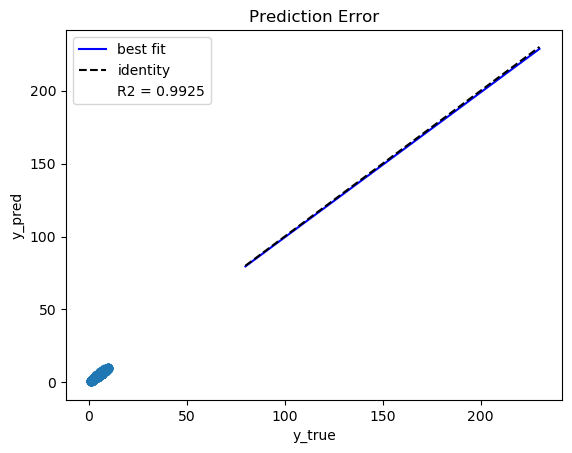

In [25]:
plot.prediction_error(y_true_gbr, rounded_predicted_gbr)

### Using XGBoost

In [26]:
model_xgboost = Pipeline(
    steps=[("preprocessor", preprocessor), ("xgb_model", xgb.XGBRegressor())]
)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_xgboost.fit(X_train, y_train.values.ravel())
print("model score: %.3f" % model_xgboost.score(X_test, y_test))

scores = cross_val_score(model_xgboost, X, Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final XGB RMSE:", final_avg_rmse)


model score: 0.997
Final XGB RMSE: 0.13177667040872856


#### Predicting values

In [27]:
y_pred_xgb = model_xgboost.predict(X_test)
rounded_predicted_xgb = np.array([round(item) for item in y_pred_xgb])

y_true_xgb = y_test['co2_rating'].values

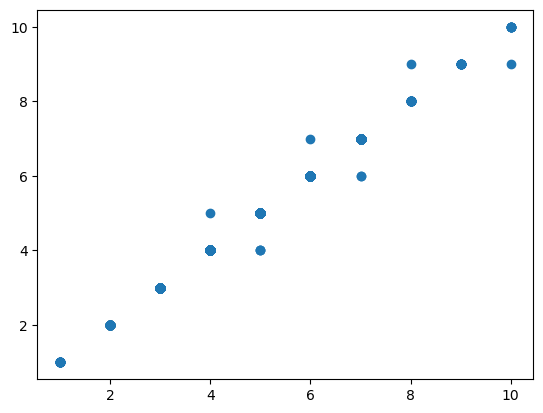

In [28]:
plt.scatter(y_true_gbr, rounded_predicted_xgb)

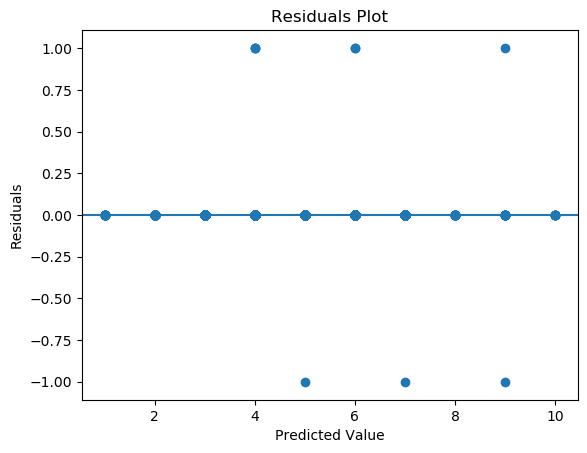

In [29]:
plot.residuals(y_true_gbr, rounded_predicted_xgb)

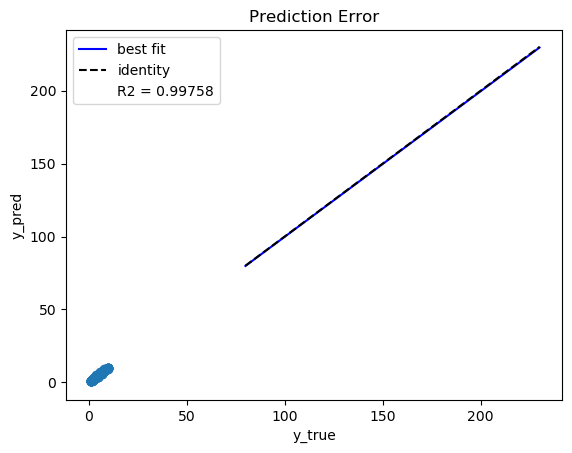

In [30]:
plot.prediction_error(y_true_gbr, rounded_predicted_xgb)

### Tuning parameters

In [31]:
gbm_param_grid = {
    'xgb_model__subsample': np.arange(.05, 1, .05),
    'xgb_model__max_depth': np.arange(3,20,1),
    'xgb_model__colsample_bytree': np.arange(.1,1.05,.05) }
randomized_neg_mse = RandomizedSearchCV(estimator=model_xgboost,
    param_distributions=gbm_param_grid, n_iter=10,
    scoring='neg_mean_squared_error', cv=10)
randomized_neg_mse.fit(X, Y.values.ravel())
print("model score: %.3f" % randomized_neg_mse.score(X_test, y_test))


model score: -0.000


In [32]:
print("Best rmse: ", np.sqrt(np.abs(randomized_neg_mse.best_score_)))

Best rmse:  0.1468470747087357


In [33]:
print("Best model: ", randomized_neg_mse.best_estimator_)

Best model:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['model_year', 'cylinders_',
                                                   'fuelconsumption_city(l/100km)',
                                                   'fuelconsumption_hwy(l/100km)',
                                                   'fuelconsumption_comb(l/100km)',
                                                   'fuelconsumption_comb(mpg)',
                                                   'co2emissions_(g/km)',
                                                   'number_of_gears.

In [34]:
randomized_neg_mse.best_params_

{'xgb_model__subsample': 0.8500000000000001,
 'xgb_model__max_depth': 12,
 'xgb_model__colsample_bytree': 0.9500000000000003}

In [35]:
randomized_neg_mse.param_distributions

{'xgb_model__subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
        0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 'xgb_model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'xgb_model__colsample_bytree': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
        0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}

### Observing outliers

In [36]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_tukey(x):
    
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indeces = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indeces])
    
    return outlier_values

def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott',fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_value

### Tukey method

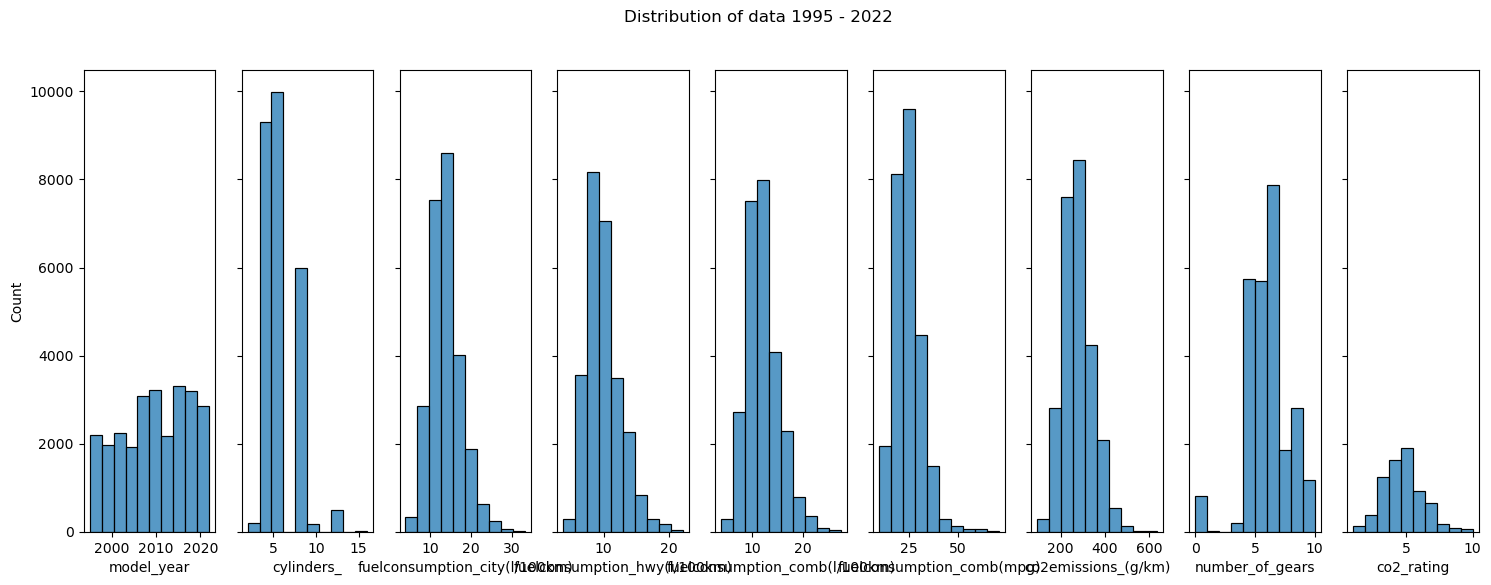

In [44]:
box_plot(master_df, numeric_features + ["co2_rating"], "hist")

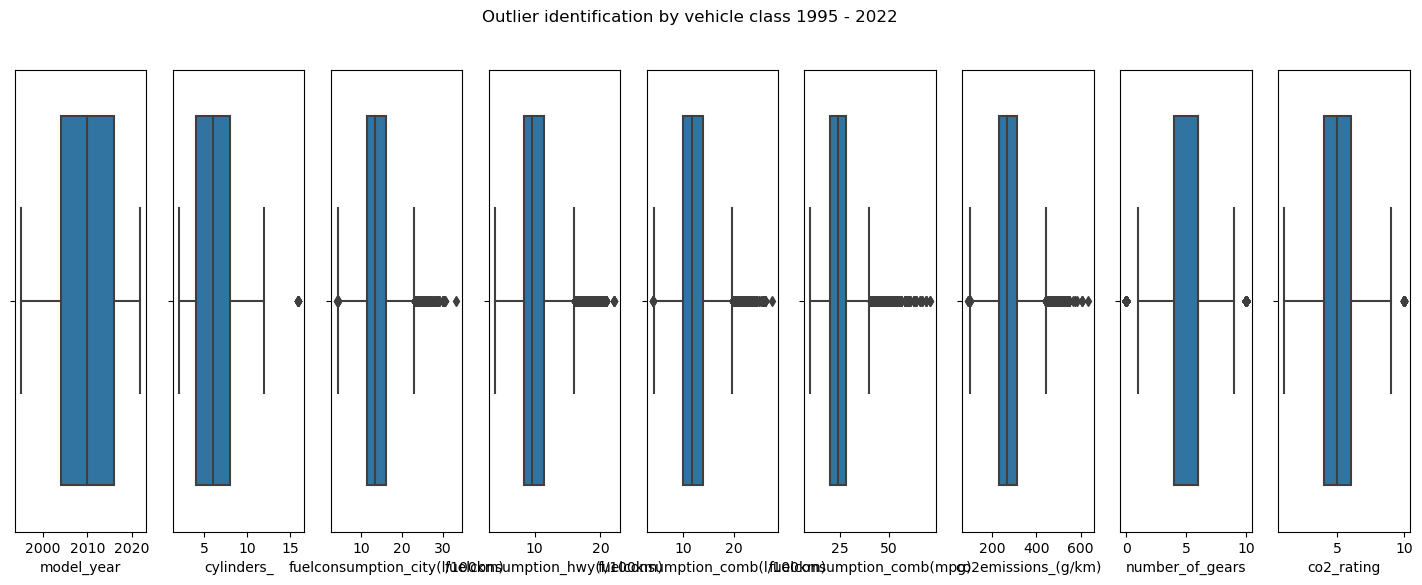

In [45]:
box_plot(master_df, numeric_features + ["co2_rating"], "box")

In [43]:
outliers = {}
for item in numeric_features + ["co2_rating"]:
    outliers[item] = np.sort(find_outliers_tukey(master_df[item]))
    print(item, len(outliers[item]))
    

model_year 0
cylinders_ 12
fuelconsumption_city(l/100km) 557
fuelconsumption_hwy(l/100km) 649
fuelconsumption_comb(l/100km) 605
fuelconsumption_comb(mpg) 527
co2emissions_(g/km) 336
number_of_gears 1338
co2_rating 0
